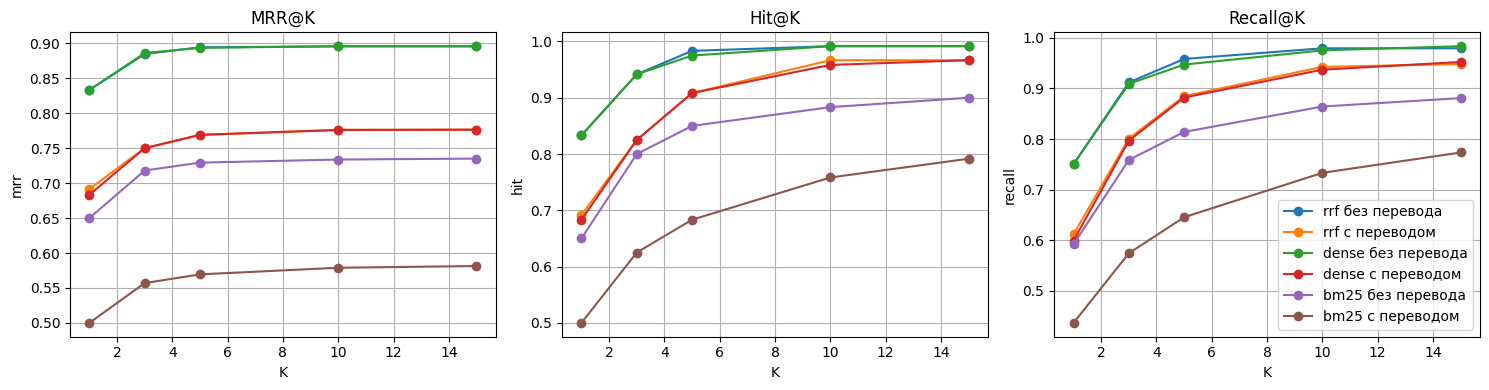

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
rrf = pd.read_csv("rrf_after.csv")
rrf2 = pd.read_csv("translate_rrf.csv")


bm25 = pd.read_csv("bm25_without.csv")
bm252 = pd.read_csv("bm25_with_translate.csv")

dense2 = pd.read_csv("dense_with_translate.csv")
dense = pd.read_csv("dense_without.csv")



metrics = ["mrr", "hit", "recall"]
titles = ["MRR@K", "Hit@K", "Recall@K"]



fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

for ax, metric, title in zip(axs, metrics, titles):
    ax.plot(rrf["k"], rrf[metric], marker="o", label="rrf без перевода")
    ax.plot(rrf2["k"],  rrf2[metric],  marker="o", label="rrf с переводом")
    ax.plot(dense["k"], dense[metric], marker="o", label="dense без перевода")
    ax.plot(dense2["k"],  dense2[metric],  marker="o", label="dense с переводом")
    ax.plot(bm25["k"], bm25[metric], marker="o", label="bm25 без перевода")
    ax.plot(bm252["k"],  bm252[metric],  marker="o", label="bm25 с переводом")
    ax.set_title(title)
    ax.set_xlabel("K")
    ax.set_ylabel(metric)
    ax.grid(True)

axs[-1].legend(loc="lower right")
plt.tight_layout()
plt.savefig("compare_translate.png", dpi=200)
plt.show()

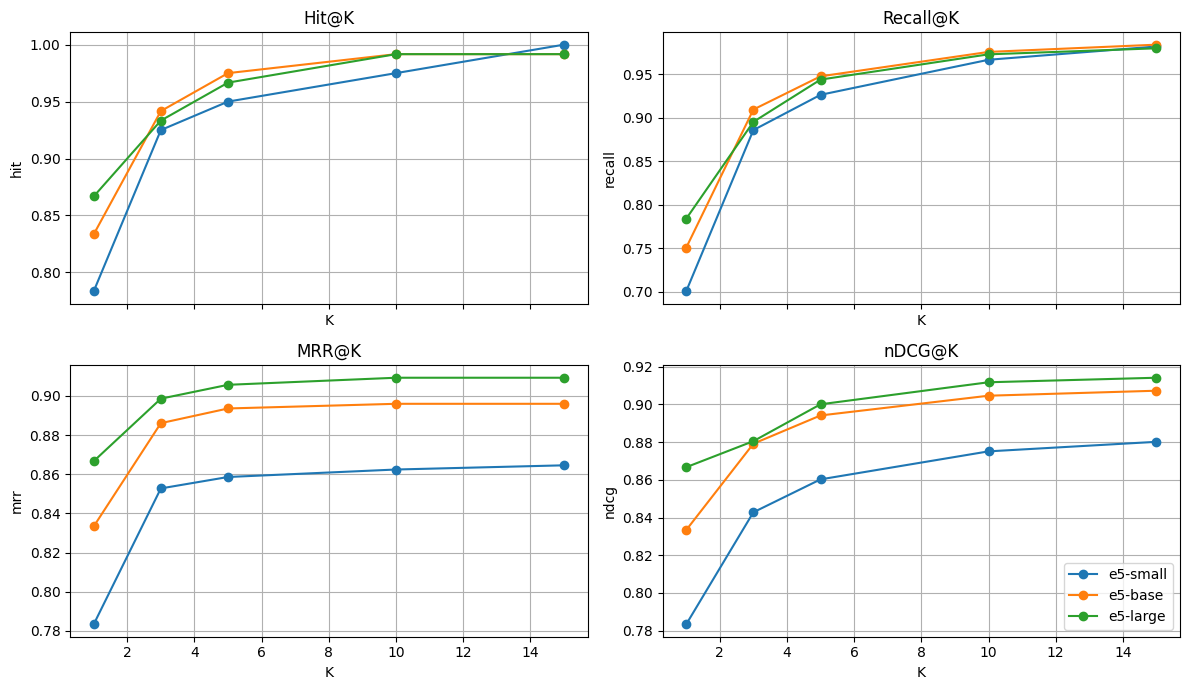

In [20]:
base = pd.read_csv("base_dense.csv")
small = pd.read_csv("small_dense.csv")
large = pd.read_csv("large_dense.csv")

metrics = ["hit", "recall", "mrr", "ndcg"]
titles  = ["Hit@K", "Recall@K", "MRR@K", "nDCG@K"]

fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=True)

for ax, metric, title in zip(axs.ravel(), metrics, titles):
    ax.plot(small["k"], small[metric], marker="o", label="e5-small")
    ax.plot(base["k"],  base[metric],  marker="o", label="e5-base")
    ax.plot(large["k"], large[metric], marker="o", label="e5-large")

    ax.set_title(title)
    ax.set_xlabel("K")
    ax.set_ylabel(metric)
    ax.grid(True)



axs[1, 1].legend(loc="lower right") 
plt.tight_layout()
plt.savefig("compare_models.png", dpi=200)
plt.show()
